# Training the neural network

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ( Dense, Dropout, Flatten, Conv2D, MaxPooling2D )
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
# Preprocess the data 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10) 
# Define model architecture 
model = Sequential()
model.add(Conv2D(
    32, 
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(28, 28, 1)
))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) 
# Compile model 
model.compile( 
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'] 
)

# Train model 
model.fit(
    x_train, y_train, 
    batch_size=128, 
    epochs=5, 
    validation_data=(x_test, y_test)
)
score = model.evaluate(x_test, y_test, verbose=0)
# Evaluate model on test set 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2023-10-07 18:45:16.328922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-07 18:45:17.720816: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2665 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:4f:00.0, compute capability: 8.6


Epoch 1/5


2023-10-07 18:45:19.032583: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-10-07 18:45:20.475953: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8200
2023-10-07 18:45:23.747284: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-07 18:45:23.918212: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55ed61a8f870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-07 18:45:23.918244: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-10-07 18:45:23.935340: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_uti

469/469 [==============================] - 13s 11ms/step - loss: 0.3342 - accuracy: 0.9004 - val_loss: 0.0921 - val_accuracy: 0.9732
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1274 - accuracy: 0.9622 - val_loss: 0.0621 - val_accuracy: 0.9807
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0987 - accuracy: 0.9705 - val_loss: 0.0534 - val_accuracy: 0.9829
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0825 - accuracy: 0.9755 - val_loss: 0.0459 - val_accuracy: 0.9840
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0723 - accuracy: 0.9779 - val_loss: 0.0458 - val_accuracy: 0.9839
Test loss: 0.04575083404779434
Test accuracy: 0.9839000105857849


# Computing SHAP values with the Gradient Explainer

In [3]:
import shap
import time 

# x_test is large, take a sample 
x_sample = shap.sample(x_train, 500)
# Pass list of inputs to explainer since we have two inputs 
explainer = shap.GradientExplainer(model, data=x_sample) 
# Explain model's predictions on first three test set samples 
start_time = time.time() 
shap_values = explainer.shap_values(x_test[:3]) 
gradient_time = time.time() - start_time
print(len(shap_values))
print(shap_values[0].shape)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


10
(3, 28, 28, 1)


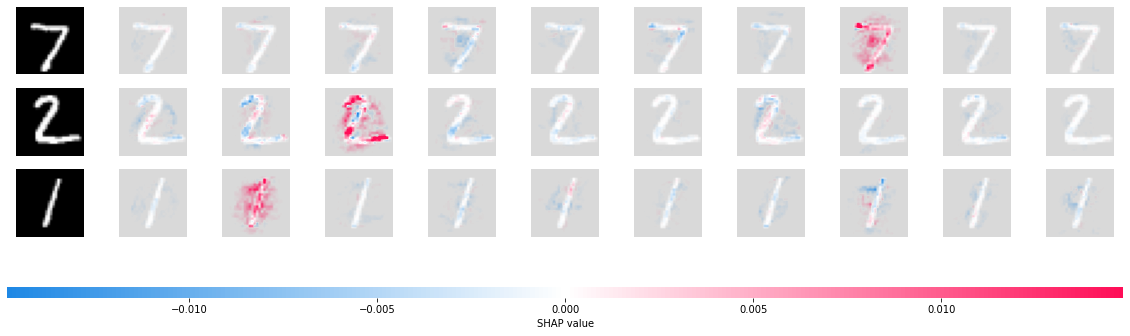

In [4]:
shap.image_plot(shap_values, x_test[:3])

# SHAP with the Deep Explainer

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


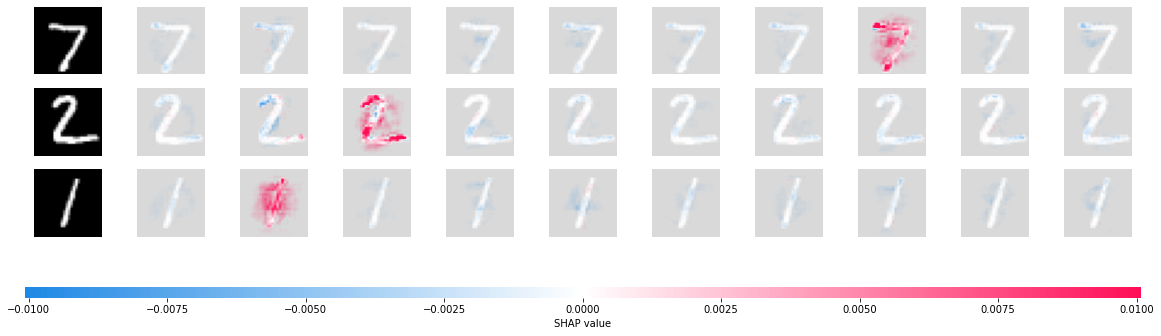

In [5]:
explainer = shap.DeepExplainer(model, data = x_sample)
start_time = time.time()
shap_values = explainer.shap_values(x_test[:3])
deep_time = time.time() - start_time
shap.image_plot(shap_values, x_test[:3])

In [6]:
print('Gradient explainer: ', round(gradient_time, 2))
print('Deep explainer: ', round(deep_time, 2))

Gradient explainer:  1.4
Deep explainer:  4.63
